# KARINA FRANCIELI SCHMIDT - 2023314

## Lecturer:  Muhammad 

# Machine learning

In [1]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler

Code below to read the dataframe file.

df = pd.read_csv('customer_shopping_data.csv')

Below we can quickly visualise the data, the column names and the first rows

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


The '.shape' code shows the total number of rows and columns in the dataframe

In [4]:
print(df.shape)


(99457, 10)


In [5]:
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
# Missing value
valores_faltantes = df.isnull().sum()

print(valores_faltantes)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Transfomaçao da coluna gender de object pra in (categorical to numerical) para poder fazer a leitura em ML

In [9]:
# Criando um mapeamento de gênero para números
gender_mapping = {'Female': 0, 'Male': 1}

# Aplicando o mapeamento para transformar os valores de gênero em inteiros
df['gender_int'] = df['gender'].map(gender_mapping)

# Verificando as transformações
df[['gender', 'gender_int']].head()

,gender,gender_int
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0


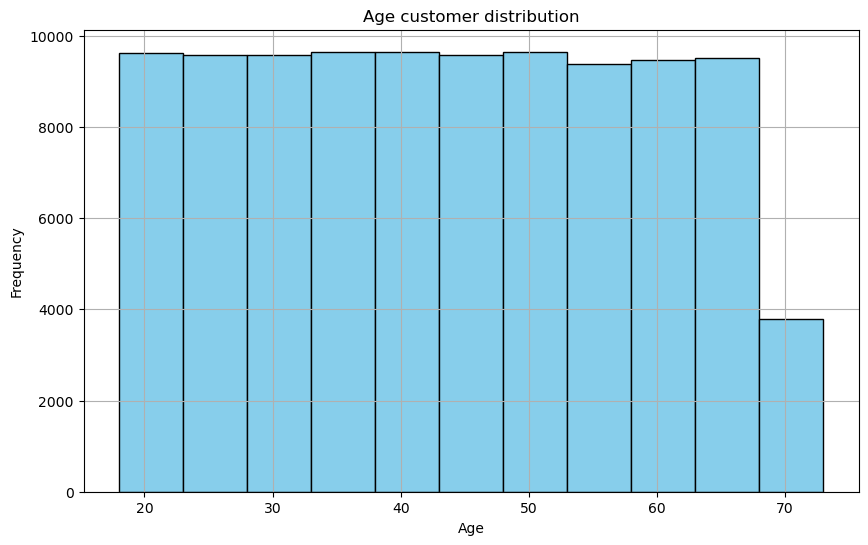

In [10]:
# Plotando o histograma da idade dos clientes
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=range(min(df['age']), max(df['age']) + 5, 5), color='skyblue', edgecolor='black')
plt.title('Age customer distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Criando um mapeamento de gênero para números
gender_mapping = {'Female': 0, 'Male': 1}

# Aplicando o mapeamento para transformar os valores de gênero em inteiros
df['gender_int'] = df['gender'].map(gender_mapping)

# Verificando as transformações
df[['gender', 'gender_int']].head()

,gender,gender_int
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0


## Total sale stats by gender

In [12]:
# Calculando o total de vendas por compra
df['total_sales'] = df['quantity'] * df['price']

# Agrupando os dados por gênero e obtendo estatísticas descritivas
stats_by_gender = df.groupby('gender')['total_sales'].describe()

# Exibindo as estatísticas descritivas
print(stats_by_gender)

          count         mean          std   min     25%     50%      75%  \
gender                                                                     
Female  59482.0  2525.253623  4226.617822  5.23  136.35  600.17  2700.72   
Male    39975.0  2534.050237  4216.352329  5.23  130.75  600.17  2700.72   

            max  
gender           
Female  26250.0  
Male    26250.0  


In [13]:
# Calculando o total de vendas por compra
df['total_sales'] = df['quantity'] * df['price']

# Agrupando os dados por gênero e obtendo estatísticas descritivas
stats_by_age = df.groupby('age')['total_sales'].describe()

# Exibindo as estatísticas descritivas
print(stats_by_age)

      count         mean          std   min       25%     50%      75%  \
age                                                                      
18   1844.0  2384.880835  3984.756235  5.23  136.3500  573.44  2700.72   
19   1936.0  2403.584003  3884.889153  5.23  141.6075  600.17  2700.72   
20   1844.0  2498.819875  4101.978243  5.23  130.7500  573.44  2700.72   
21   1947.0  2494.174838  4163.498999  5.23  143.3600  600.17  2700.72   
22   2051.0  2539.659391  4343.772540  5.23  143.3600  650.56  2700.72   
23   1897.0  2450.074544  4103.851863  5.23  130.7500  600.17  2700.72   
24   1977.0  2570.768791  4322.038140  5.23  130.7500  600.17  2700.72   
25   1863.0  2503.589630  4125.471617  5.23  136.3500  600.17  2700.72   
26   1896.0  2627.328492  4393.804554  5.23  130.7500  600.17  2700.72   
27   1950.0  2652.235415  4308.580655  5.23  136.3500  650.56  4200.00   
28   1953.0  2529.511224  4186.083347  5.23  136.3500  600.17  2700.72   
29   1885.0  2590.858790  4261.996393 

### Avarege sales per age

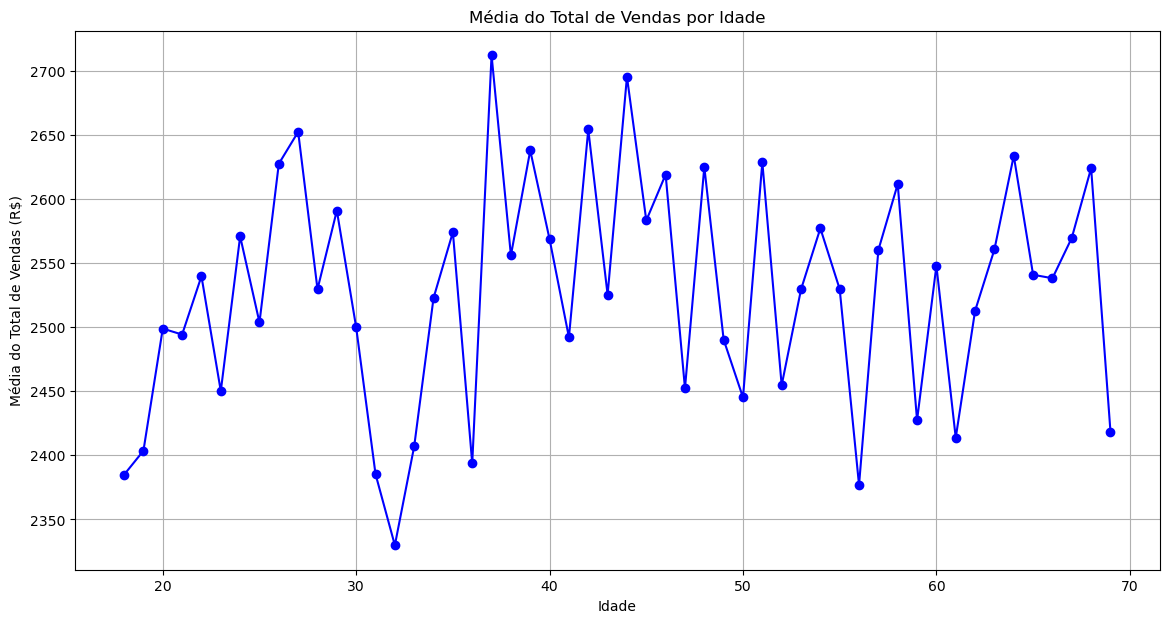

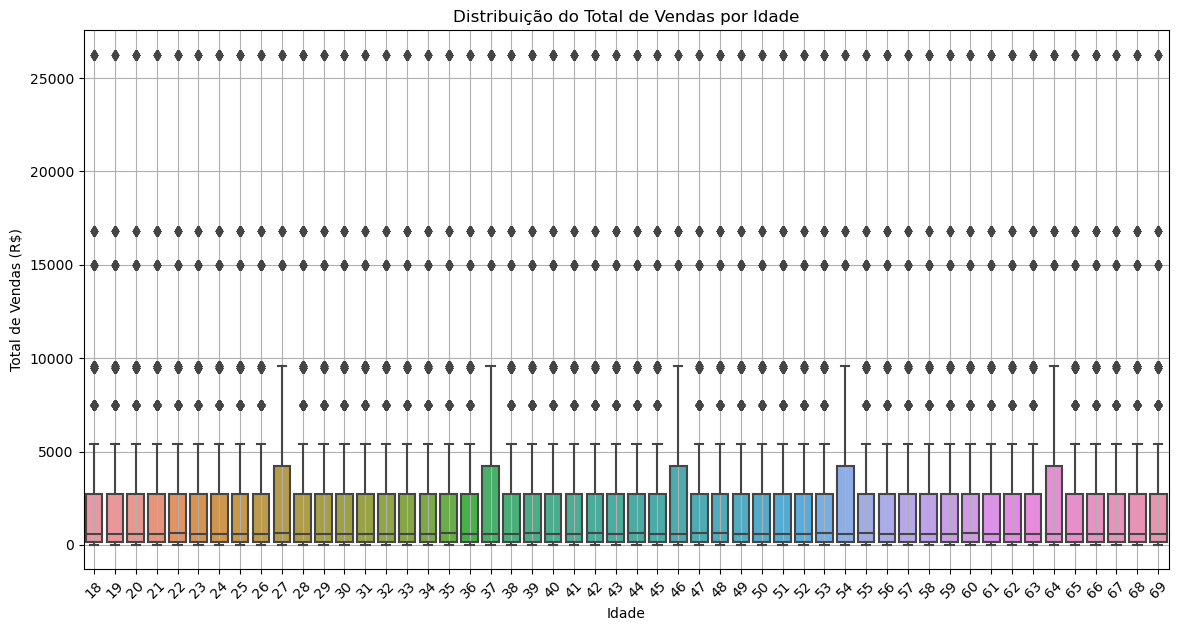

In [14]:

# Gráfico de Linha para Médias de Vendas por Idade
plt.figure(figsize=(14, 7))
plt.plot(stats_by_age.index, stats_by_age['mean'], marker='o', linestyle='-', color='b')
plt.title('Média do Total de Vendas por Idade')
plt.xlabel('Idade')
plt.ylabel('Média do Total de Vendas (R$)')
plt.grid(True)
plt.show()

# Boxplot para Distribuição do Total de Vendas por Idade
plt.figure(figsize=(14, 7))
sns.boxplot(x='age', y='total_sales', data=df)
plt.title('Distribuição do Total de Vendas por Idade')
plt.xlabel('Idade')
plt.ylabel('Total de Vendas (R$)')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)
plt.show()

### Avarege sales per gender

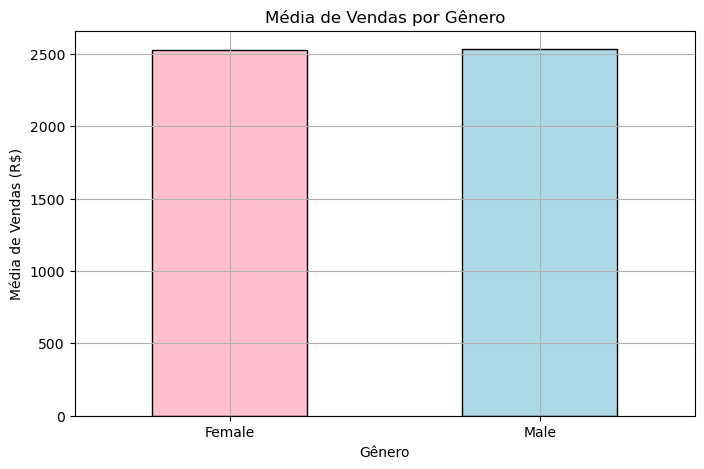

In [15]:
# Agrupando os dados por gênero e calculando a média das vendas
mean_sales_by_gender = df.groupby('gender')['total_sales'].mean()

# Criando o gráfico de barras para as médias
plt.figure(figsize=(8, 5))
mean_sales_by_gender.plot(kind='bar', color=['pink', 'lightblue'], edgecolor='black')
plt.title('Média de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Vendas (R$)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Gráfico de frequencia, onde  coloca em evidencia 

O histograma e as estatísticas descritivas mostram que não há vendas com valor zero no dataset. O valor mínimo de vendas é R$ 5,23, e os dados mostram uma distribuição com a média de vendas sendo R$ 2528,79 e a venda máxima atingindo R$ 26250,00. Isso confirma que os totais de vendas estão todos acima de zero.

Distribuição de Vendas: A maior frequência de vendas está nos valores mais baixos, com a frequência diminuindo à medida que o valor das vendas aumenta. Isso é típico em muitos contextos comerciais onde transações de menor valor são mais comuns do que transações de alto valor.
Forma da Distribuição: A distribuição é fortemente inclinada à direita, indicando que a maioria das vendas está concentrada nos valores menores, enquanto vendas de valores muito altos são menos frequentes.
Variação e Média: O valor médio das vendas é de R$ 2528,79, mas a distribuição mostra que a maioria das vendas individuais é muito menor que esse valor médio, sugerindo uma variação significativa no total de vendas.
Análise Estatística Descritiva
Mínimo: O menor valor de venda é R$ 5,23.
Máximo: O maior valor de venda é R$ 26.250,00.
Média: A média de vendas é de R$ 2528,79, indicando o ponto médio ponderado das vendas.
Mediana (50% quantil): A mediana das vendas é de R$ 600,17, o que significa que metade das vendas é menor que este valor e a outra metade é maior. A mediana é menos sensível a valores extremos (outliers) do que a média.
Quartis:
25% quantil: 25% das vendas são menores que R$ 136,35.
75% quantil: 75% das vendas são menores que R$ 2700,72.

### Total sales quantity (price)

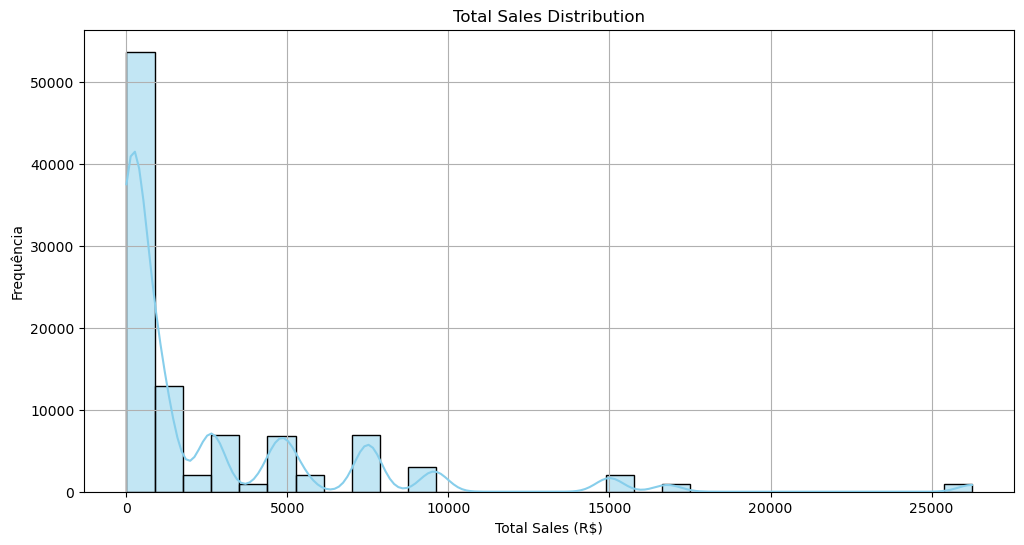

In [16]:
# Garantindo que o total de vendas está calculado
df['total_sales'] = df['quantity'] * df['price']

# Criando um histograma e um gráfico KDE para o total de vendas
plt.figure(figsize=(12, 6))
sns.histplot(df['total_sales'], kde=True, color='skyblue', bins=30, edgecolor='black')
plt.title('Total Sales Distribution')
plt.xlabel('Total Sales (R$)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Frequancy by gender

Female    59482
Male      39975
Name: gender, dtype: int64


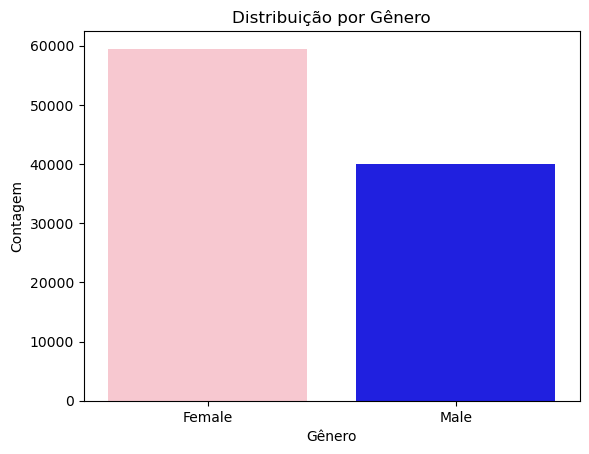

In [17]:
# Primeiro, exibindo a contagem de valores para gênero
print(df.gender.value_counts())

# Agora, criando o gráfico
sns.countplot(data=df, x='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

Female    59482
Male      39975
Name: gender, dtype: int64


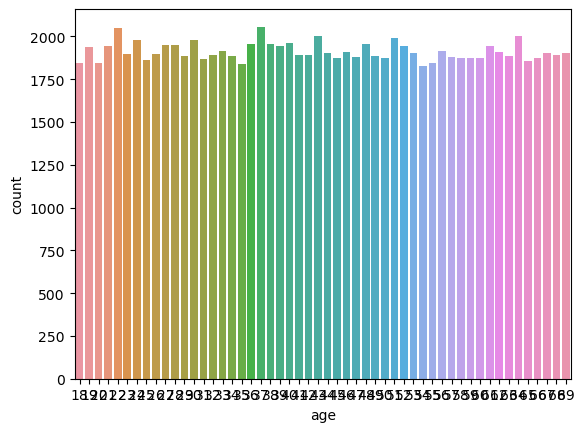

In [18]:
print(df.gender.value_counts())
sns.countplot(data=df,x='age')
plt.show()

### Itens sold by gender

In [19]:
pd.crosstab(df.gender,df.category,values=((df['age'] <= 18) & (df['age'] < 40)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,66,386,165,155,101,56,52,98
Male,40,260,102,126,70,52,37,78


In [20]:
pd.crosstab(df.gender,df.category,values=((df['age'] >=40 ) & (df['age'] <=69)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,1679,11822,5257,5089,3469,1734,1688,3495
Male,1201,7992,3474,3357,2319,1128,1161,2262


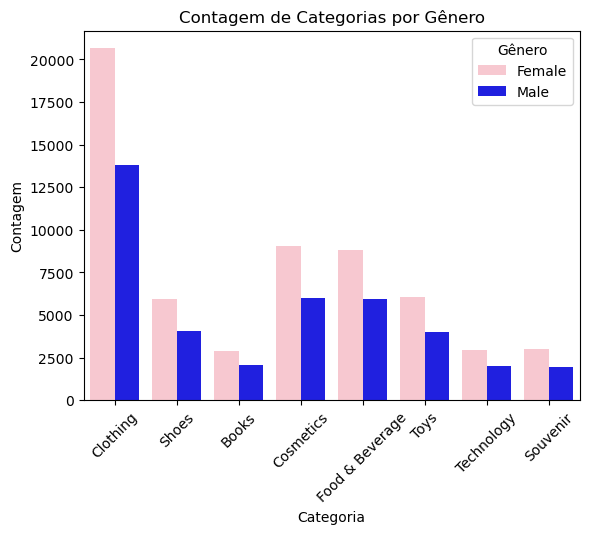

In [21]:
# Criando o gráfico
sns.countplot(data=df, x='category', hue='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.xticks(rotation=45)  # Ajusta o ângulo de rotação conforme necessário
plt.title('Contagem de Categorias por Gênero')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.show()


### Itens sold by age

In [22]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column in the DataFrame with the age range labels
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Use pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])
cross_tab

AgeRange,0-20,21-30,31-40,41-50,51-60,61+
category,,,,,,
Books,289,964,946,952,966,864
Clothing,1974,6752,6627,6662,6548,5924
Cosmetics,825,2894,2950,2881,2934,2613
Food & Beverage,863,2824,2931,2812,2796,2550
Shoes,575,1954,1907,1944,1902,1752
Souvenir,277,974,992,930,975,851
Technology,252,991,1006,965,932,850
Toys,569,2047,1907,1920,1879,1765


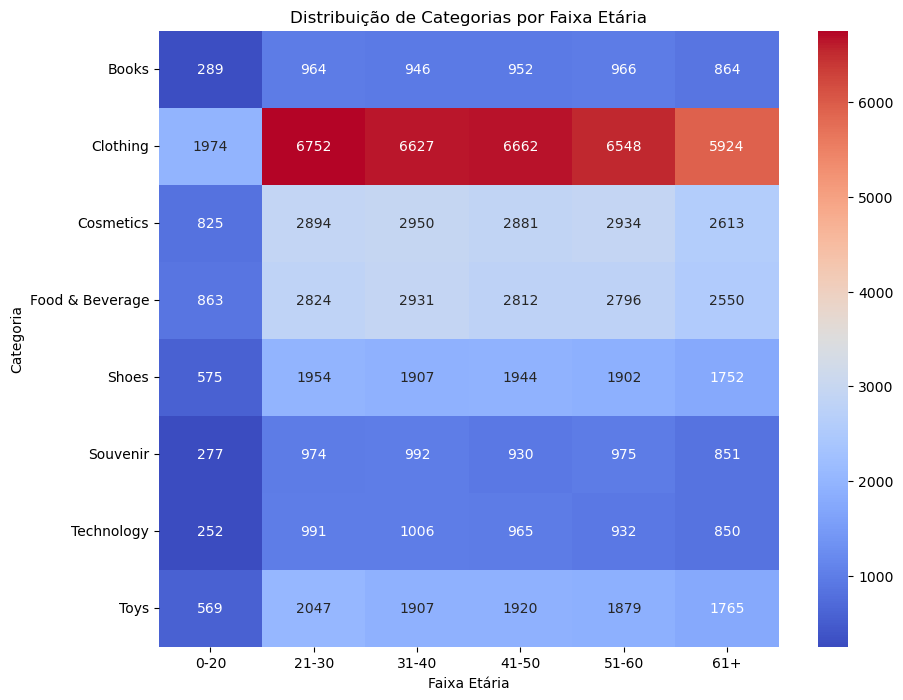

In [23]:
# Supondo que você já tenha definido 'age_bins', 'age_labels' e criado a coluna 'AgeRange' no DataFrame df
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Usando pd.crosstab para contar ocorrências das faixas etárias para cada categoria
cross_tab = pd.crosstab(df['category'], df['AgeRange'])

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Distribuição de Categorias por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Categoria')
plt.show()

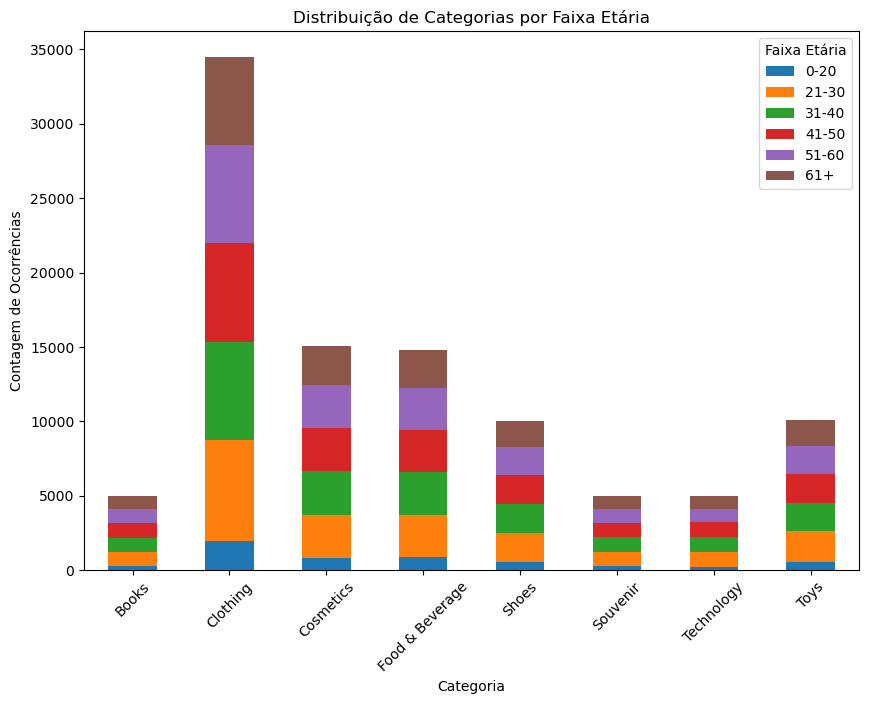

In [24]:
# Supondo que você já tenha definido 'age_bins', 'age_labels' e criado a coluna 'AgeRange' no DataFrame df
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Usando pd.crosstab para contar ocorrências das faixas etárias para cada categoria
cross_tab = pd.crosstab(df['category'], df['AgeRange'])

# Criando um gráfico de barras empilhadas
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribuição de Categorias por Faixa Etária')
plt.xlabel('Categoria')
plt.ylabel('Contagem de Ocorrências')
plt.legend(title='Faixa Etária')
plt.xticks(rotation=45)  # Ajusta o ângulo dos rótulos do eixo X para melhor visualização
plt.show()

In [25]:
df['AgeRange'].value_counts(normalize=True)


21-30    0.195059
31-40    0.193712
41-50    0.191701
51-60    0.190354
61+      0.172627
0-20     0.056547
Name: AgeRange, dtype: float64

In [26]:
print(df['category'].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


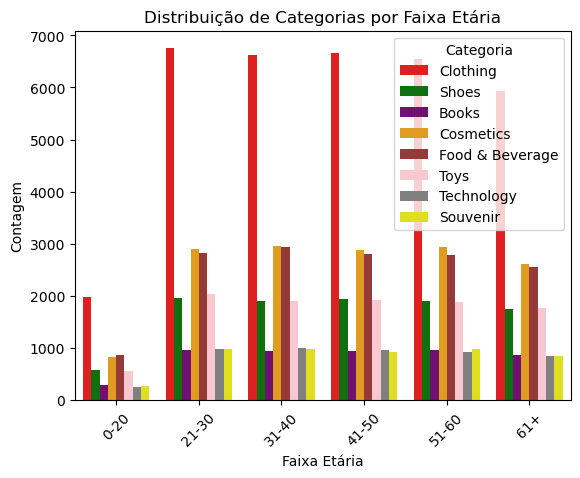

In [27]:
# Imprimir todas as categorias únicas para garantir que todas estejam no dicionário de cores
print(df['category'].unique())

palette_colors = {
    'Clothing': 'red', 
    'Shoes': 'green', 
    'Books': 'purple', 
    'Cosmetics': 'orange',
    'Food & Beverage': 'brown',  # Adicionando esta categoria com a cor marrom
    'Toys': 'pink',              # Adicionando esta categoria com a cor rosa
    'Technology': 'gray',        # Adicionando esta categoria com a cor cinza
    'Souvenir': 'yellow'         # Adicionando esta categoria com a cor amarela
}

# Agora, criando o gráfico com o dicionário de cores completo
sns.countplot(data=df, x='AgeRange', hue='category', palette=palette_colors)
plt.title('Distribuição de Categorias por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.show()

In [28]:
age_range_proportions = df['AgeRange'].value_counts(normalize=True)
print(age_range_proportions)

21-30    0.195059
31-40    0.193712
41-50    0.191701
51-60    0.190354
61+      0.172627
0-20     0.056547
Name: AgeRange, dtype: float64


### Itens sold by period

In [29]:
# Converter a coluna 'invoice_date' para datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Extrair o mês e o ano para uma nova coluna
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Calcular o total de vendas por mês (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Agrupar os dados por mês e ano, e somar as vendas totais
monthly_sales = df.groupby('month_year')['total_sale'].sum().reset_index()

# Exibir os resultados
monthly_sales

,month_year,total_sale
0,2021-01,9641614.62
1,2021-02,8772315.22
2,2021-03,9455359.38
3,2021-04,9389541.54
4,2021-05,9771756.97
5,2021-06,9286271.35
6,2021-07,10311119.68
7,2021-08,9630655.70
8,2021-09,9188165.62
9,2021-10,10263015.06


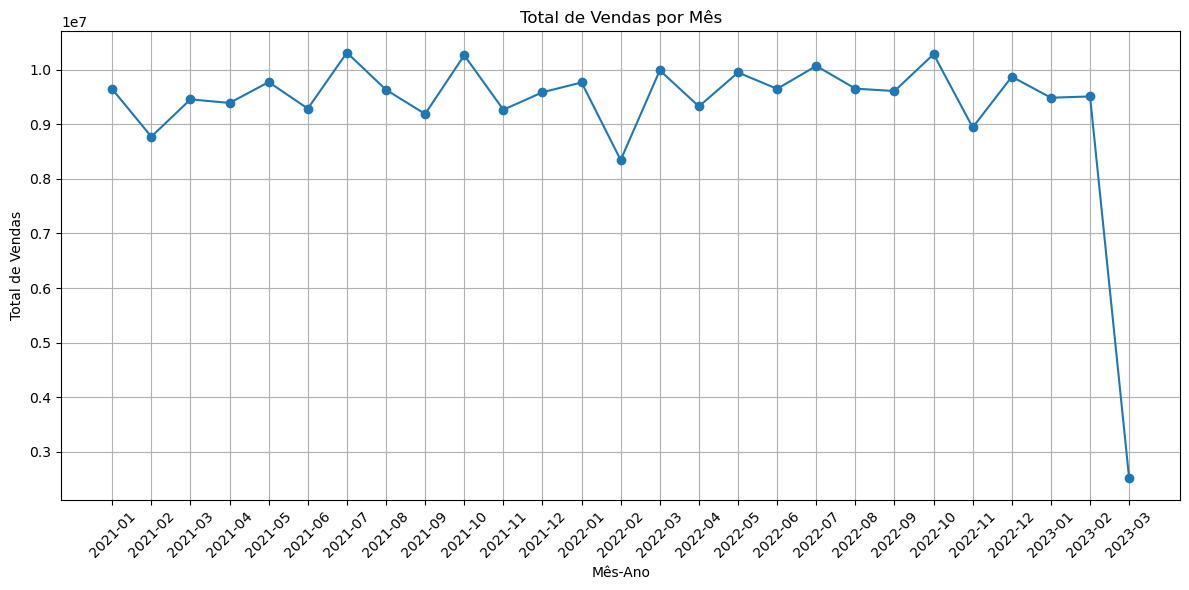

In [30]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], marker='o', linestyle='-')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

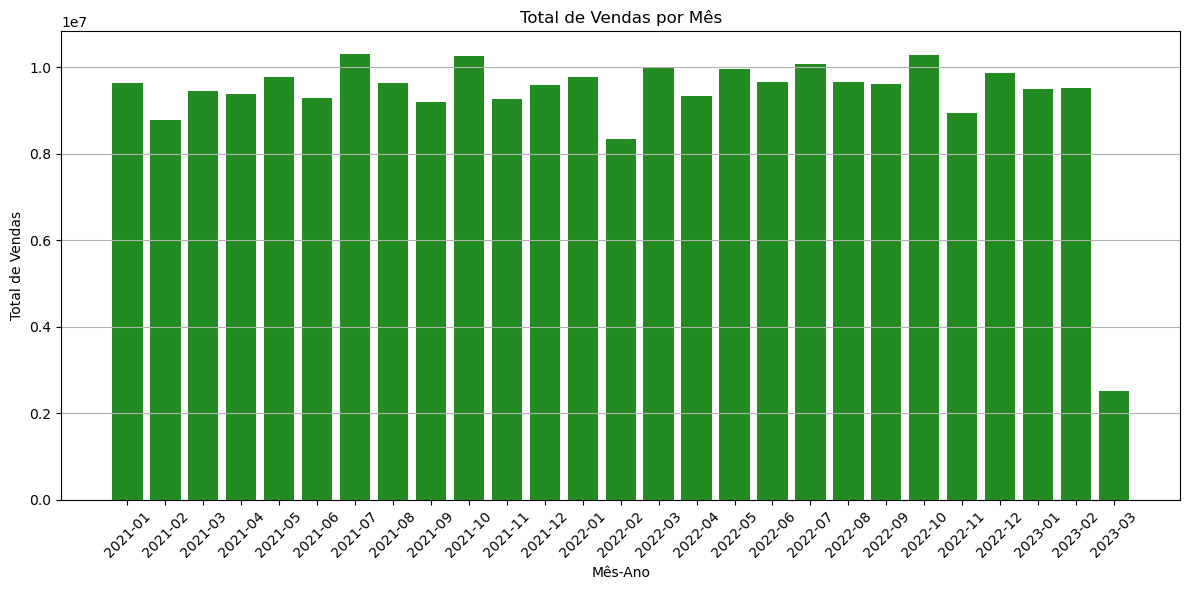

In [31]:
# Configurações do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], color='forestgreen')
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês-Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

### Payments methods

In [32]:
payment_methoud=df.payment_method.value_counts()
payment_methoud

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

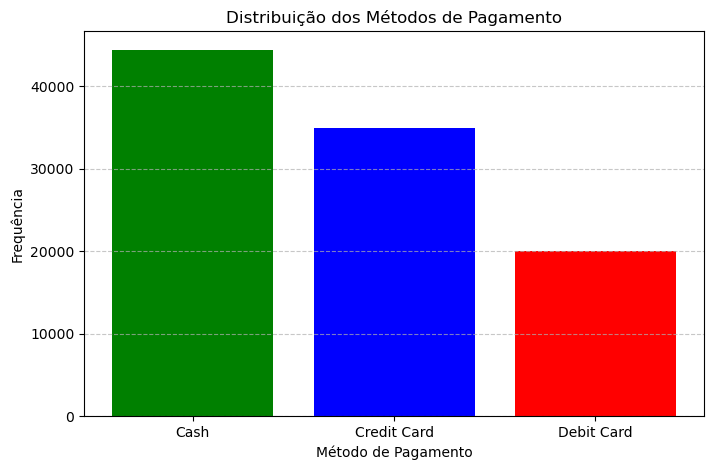

In [33]:
# Dados de métodos de pagamento
payment_methods = ['Cash', 'Credit Card', 'Debit Card']
counts = [44447, 34931, 20079]

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(payment_methods, counts, color=['green', 'blue', 'red'])
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.show()

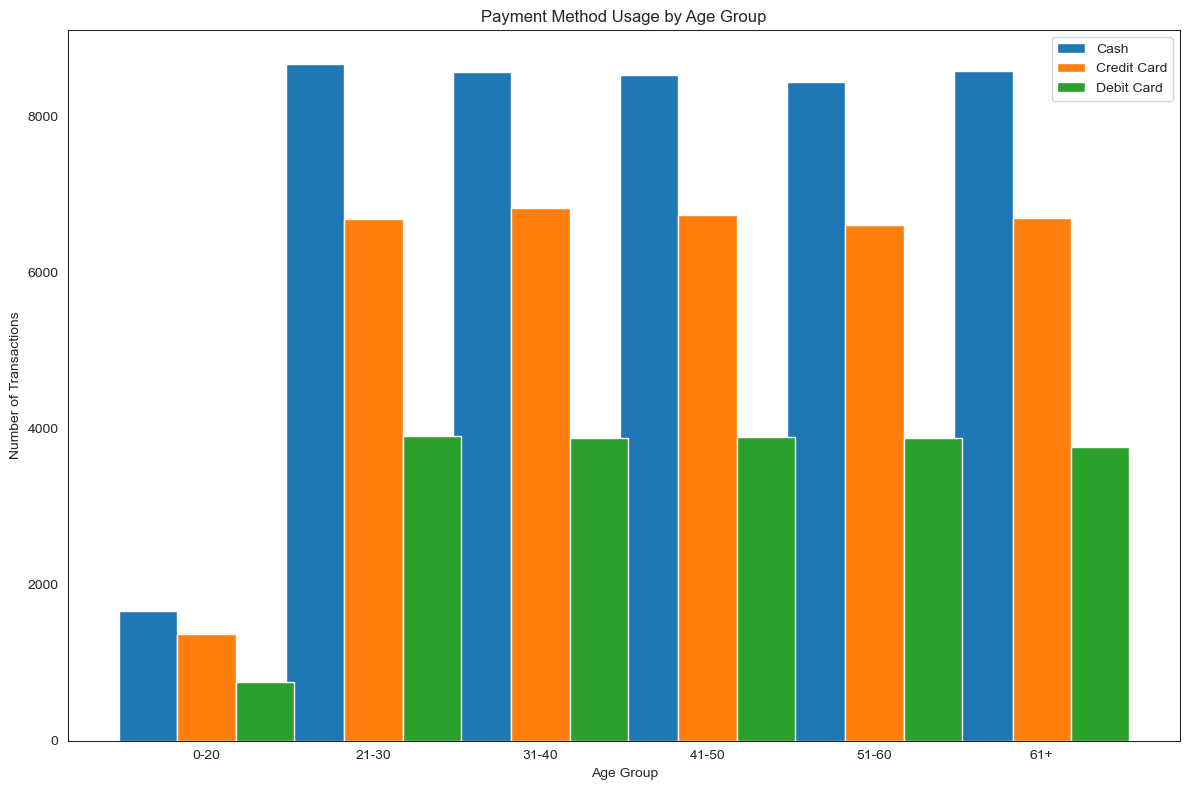

In [55]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and 'payment_method', then count the occurrences
age_payment_grouped = df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')

# Pivot this data to have age groups as indices, payment methods as columns, and counts as values
pivot_table = age_payment_grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_groups = pivot_table.index
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Dynamically create bars for each payment method
for i, payment_method in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[payment_method], width, label=payment_method)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Payment Method Usage by Age Group')
ax.set_xticks(x + width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(age_groups)
ax.legend()

# Improve layout
fig.tight_layout()

# Show the plot
plt.show()

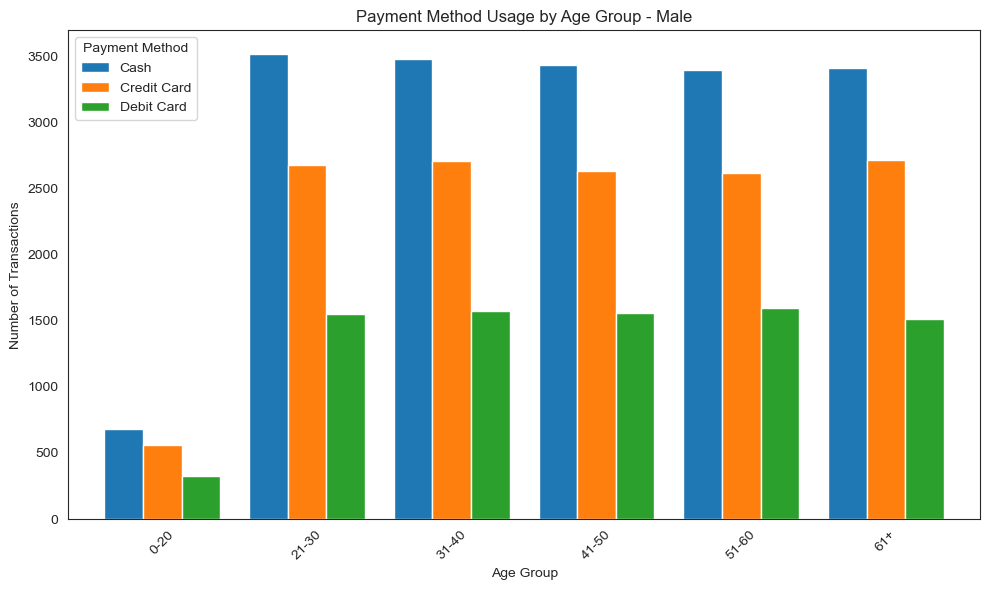

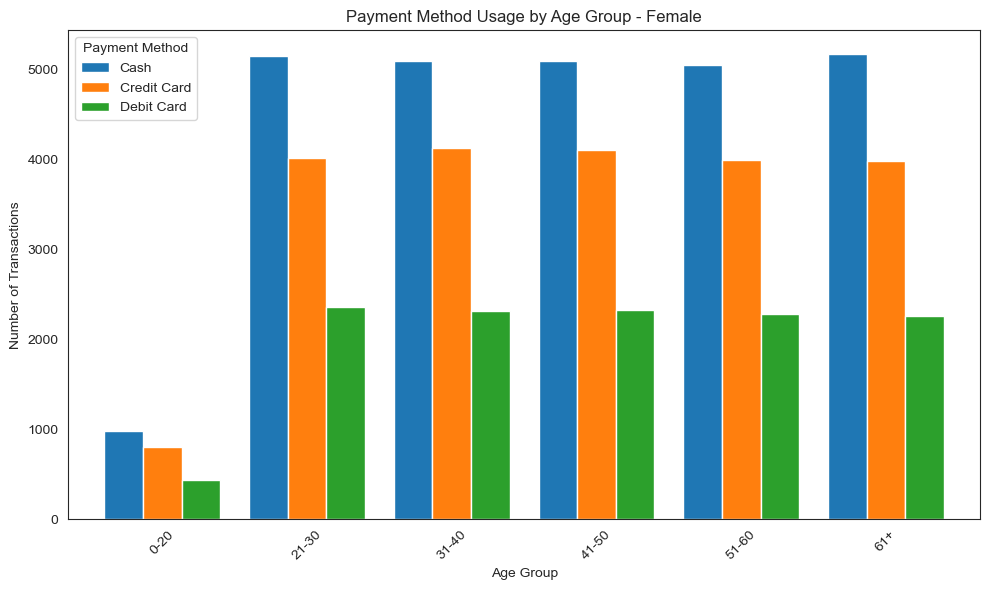

In [61]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Focus on payment methods of interest
payment_methods = ['Credit Card', 'Cash', 'Debit Card']

# Filter data for the specified payment methods
df = df[df['payment_method'].isin(payment_methods)]

# Create separate dataframes for each gender
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']

# Function to plot payment method by age group for a given gender data
def plot_payment_distribution(gender_df, gender):
    # Group by 'age_group' and 'payment_method', then count the occurrences
    grouped = gender_df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')
    pivot = grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)
    
    # Plotting
    pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Payment Method Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.legend(title='Payment Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_payment_distribution(male_df, 'Male')
plot_payment_distribution(female_df, 'Female')

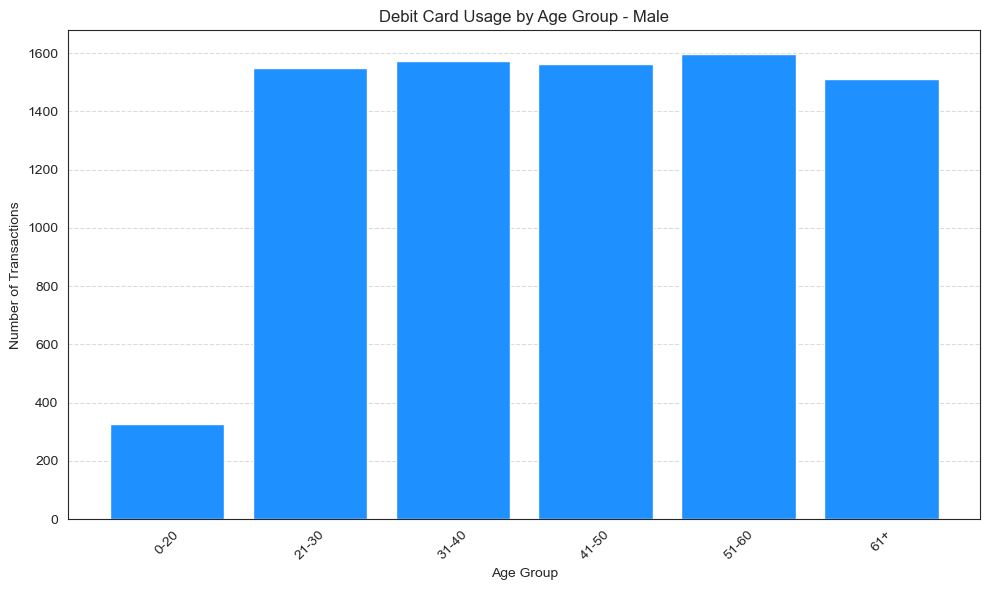

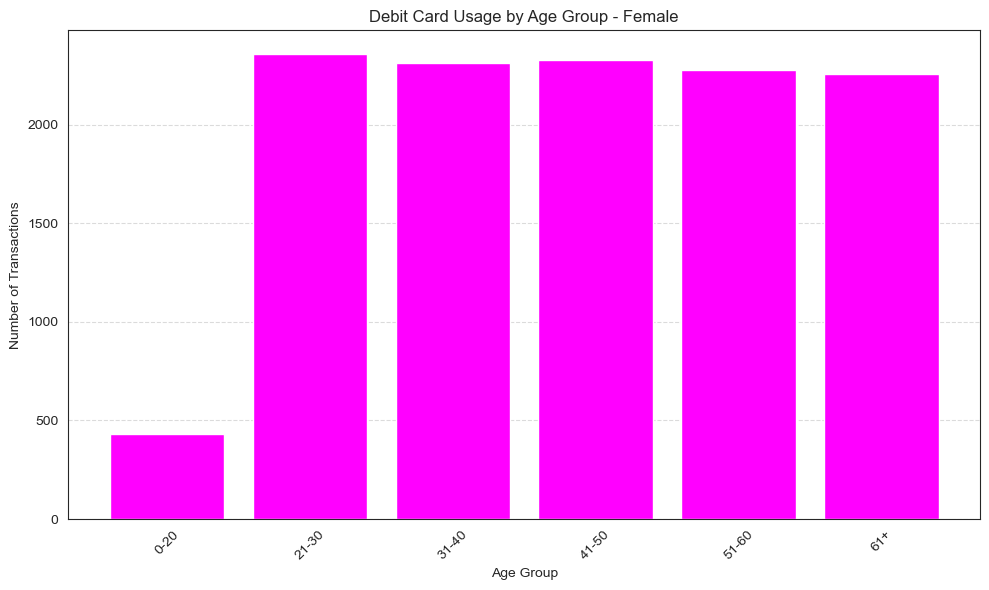

In [63]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Create separate dataframes for each gender
male_df = debit_card_df[debit_card_df['gender'] == 'Male']
female_df = debit_card_df[debit_card_df['gender'] == 'Female']

# Function to plot debit card usage by age group for a given gender
def plot_debit_card_usage(gender_data, gender):
    # Group by 'age_group' and count the occurrences
    grouped = gender_data.groupby(['age_group']).size().reset_index(name='count')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['age_group'], grouped['count'], color='dodgerblue' if gender == 'Male' else 'magenta')
    plt.title(f'Debit Card Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_debit_card_usage(male_df, 'Male')
plot_debit_card_usage(female_df, 'Female')

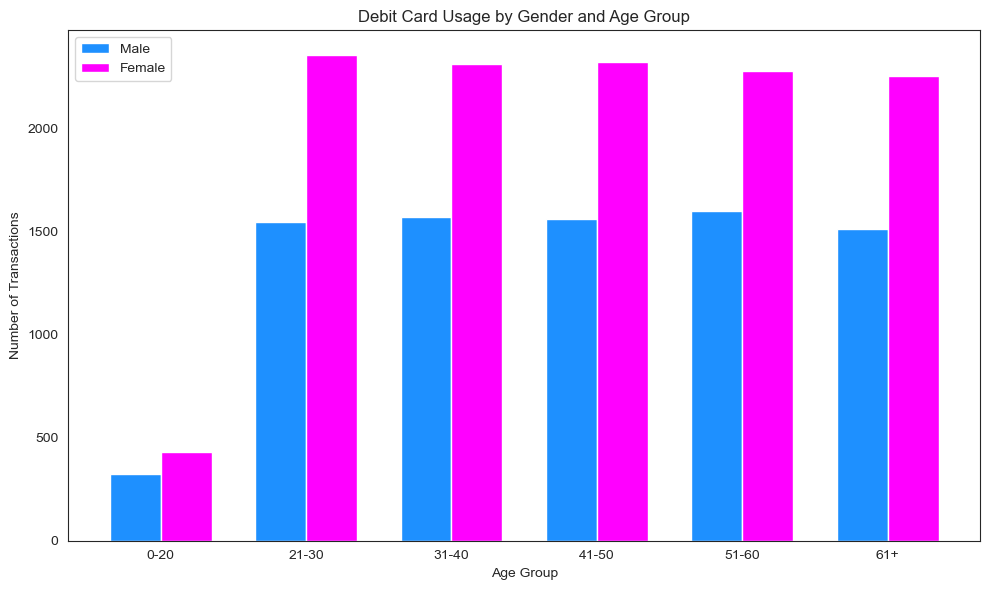

In [67]:

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = debit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Debit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

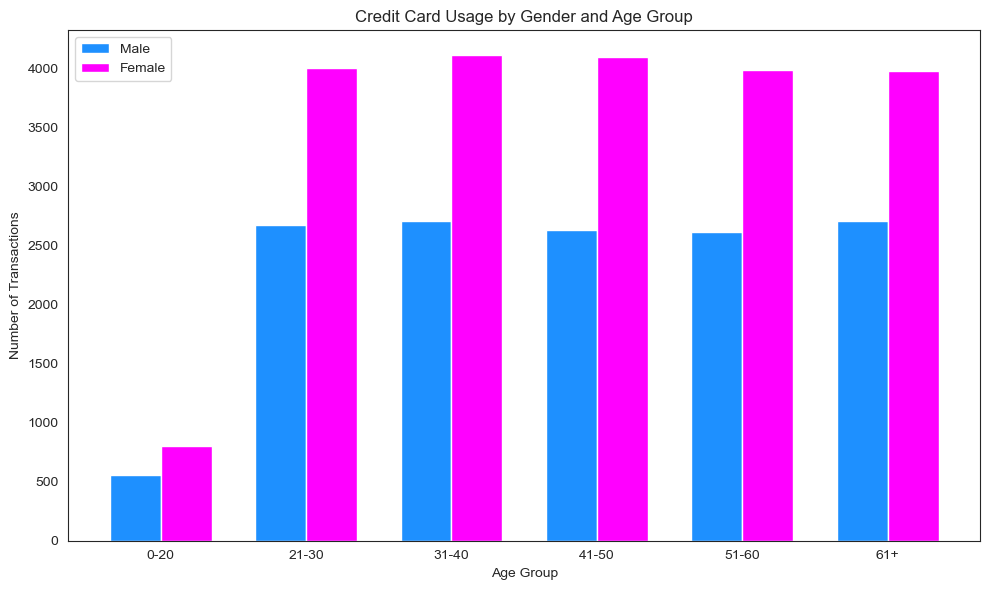

In [68]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include credit card transactions
credit_card_df = df[df['payment_method'] == 'Credit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = credit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Credit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
# Count the number of transactions for each gender
gender_counts = df['gender'].value_counts()

# Calculate the percentage difference
if 'Male' in gender_counts and 'Female' in gender_counts:
    total_purchases = gender_counts.sum()
    male_percentage = (gender_counts['Male'] / total_purchases) * 100
    female_percentage = (gender_counts['Female'] / total_purchases) * 100
    difference_percentage = abs(male_percentage - female_percentage)
    print(f"Male Purchase Percentage: {male_percentage:.2f}%")
    print(f"Female Purchase Percentage: {female_percentage:.2f}%")
    print(f"Percentage Difference in Purchases Between Genders: {difference_percentage:.2f}%")
else:
    print("Gender data may be missing or incorrect.")

Male Purchase Percentage: 40.19%
Female Purchase Percentage: 59.81%
Percentage Difference in Purchases Between Genders: 19.61%


In [34]:
# Calcular o total de vendas por item (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Agrupar os dados por shopping mall e somar as vendas totais
mall_sales = df.groupby('shopping_mall')['total_sale'].sum().reset_index()

# Ordenar os resultados para ver o shopping com maior volume de vendas
mall_sales_sorted = mall_sales.sort_values(by='total_sale', ascending=False)

# Exibir os resultados
mall_sales_sorted

,shopping_mall,total_sale
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


O "Mall of Istanbul" é o shopping mall com o maior volume de vendas, seguido de perto pelo "Kanyon

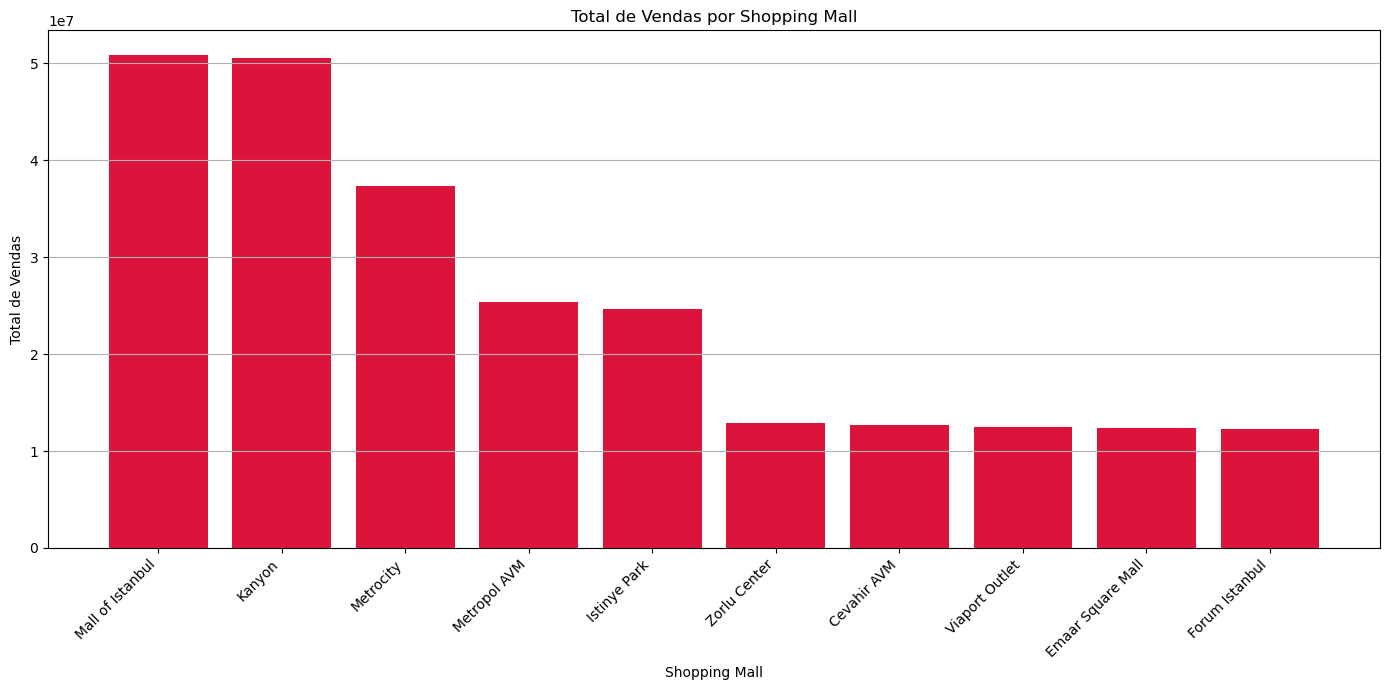

In [35]:
# Configurações do gráfico de barras para vendas por shopping mall
plt.figure(figsize=(14, 7))
plt.bar(mall_sales_sorted['shopping_mall'], mall_sales_sorted['total_sale'], color='crimson')
plt.title('Total de Vendas por Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [36]:
# Calcular o total de vendas por item (quantidade * preço)
df['total_sale'] = df['quantity'] * df['price']

# Criar faixas etárias usando pd.cut para categorizar as idades
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Definir os limites das faixas
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Agrupar os dados por shopping mall e faixa etária, e somar as vendas totais
sales_by_age_mall = df.groupby(['shopping_mall', 'age_group'])['total_sale'].sum().unstack(fill_value=0)

# Exibir os resultados
sales_by_age_mall

age_group,0-18,19-25,26-35,36-45,46-55,56-65,66-100
shopping_mall,,,,,,,
Cevahir AVM,0.0,1664351.53,2522439.02,2428486.81,2482859.54,2372138.64,1174862.66
Emaar Square Mall,0.0,1726248.08,2232306.95,2733462.67,2176061.05,2437226.57,1100794.97
Forum Istanbul,0.0,1559004.11,2474532.28,2348478.85,2358697.96,2185508.65,1377699.39
Istinye Park,0.0,3095104.71,4522268.61,4887413.37,5049685.87,4491194.27,2573160.85
Kanyon,0.0,6968564.00,9099764.49,10406256.83,9673112.69,9636923.87,4769609.22
Mall of Istanbul,0.0,6861248.79,9521269.27,10136170.90,9539940.89,10166281.49,4647570.34
Metrocity,0.0,4847601.30,7526255.90,7053751.36,7290294.95,7023341.25,3561542.57
Metropol AVM,0.0,3336741.10,5077895.34,5122245.71,4815972.56,4528360.25,2498698.23
Viaport Outlet,0.0,1766856.75,2421931.45,2376057.86,2360805.06,2477077.10,1118611.50


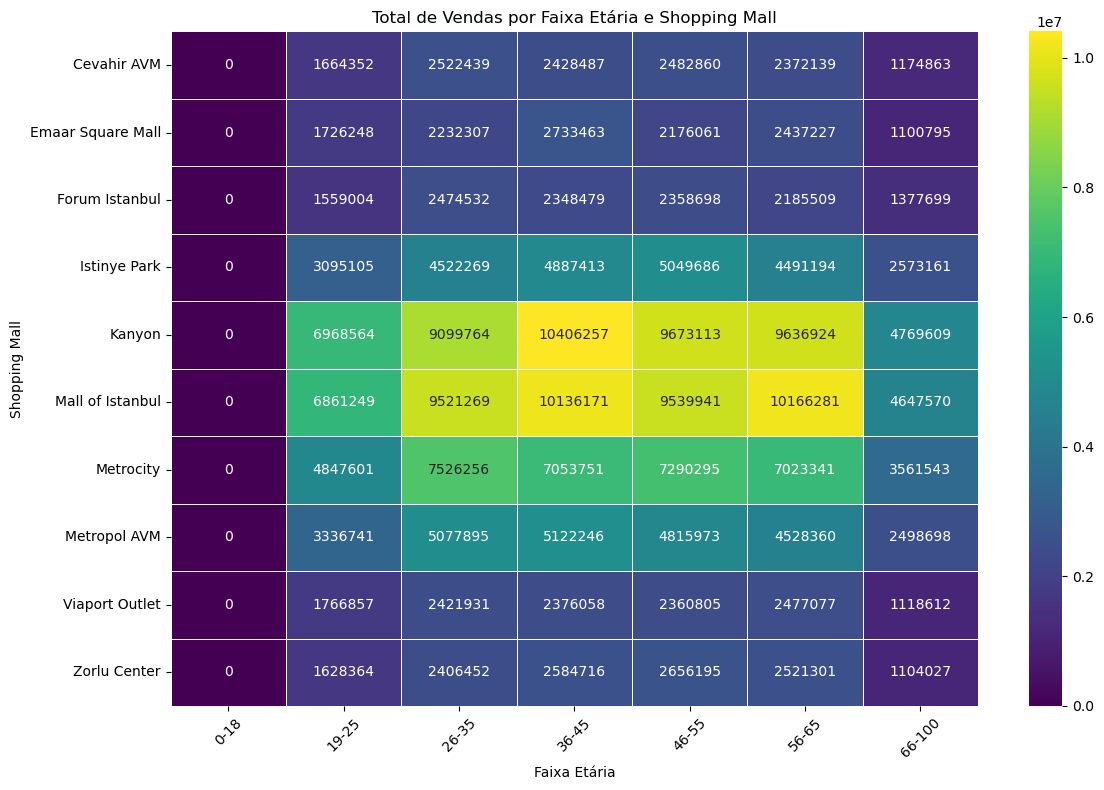

In [37]:
# Configurar o gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_age_mall, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Total de Vendas por Faixa Etária e Shopping Mall')
plt.xlabel('Faixa Etária')
plt.ylabel('Shopping Mall')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

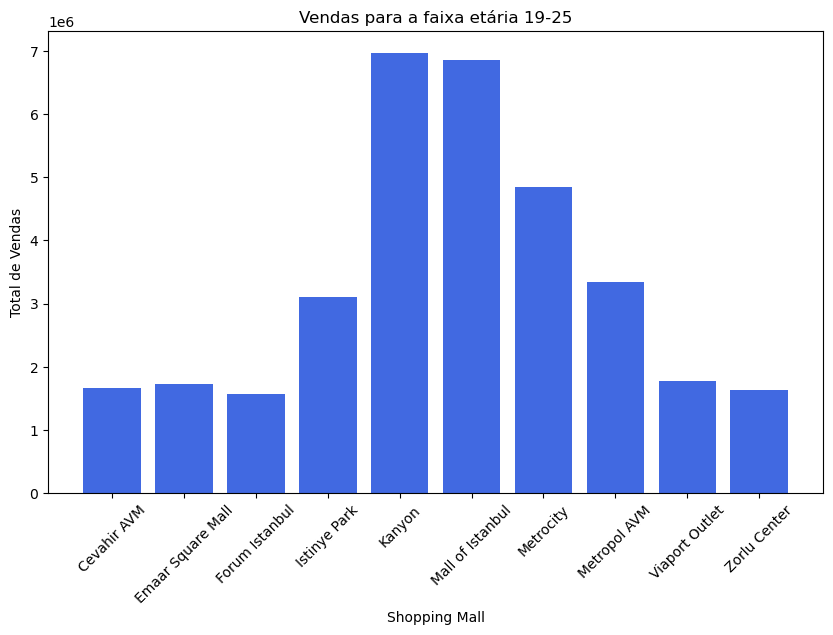

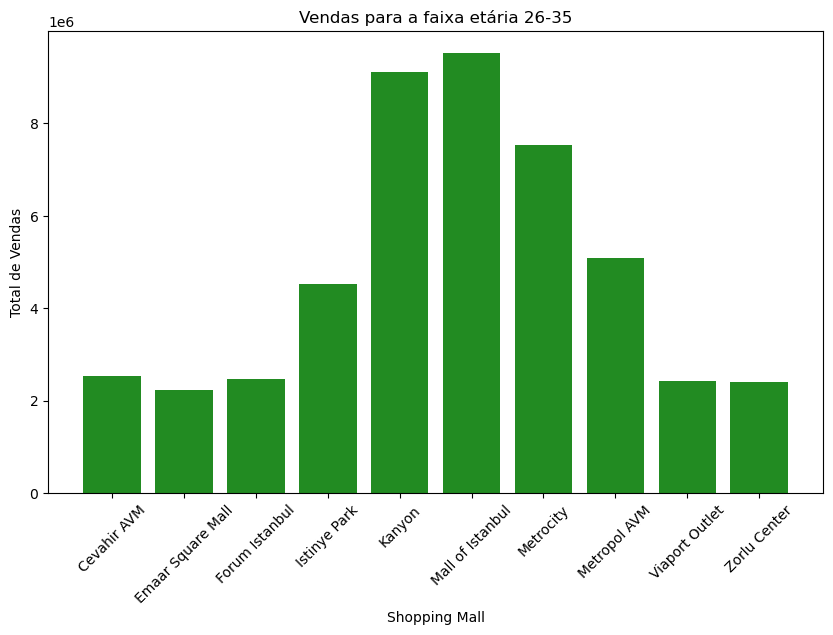

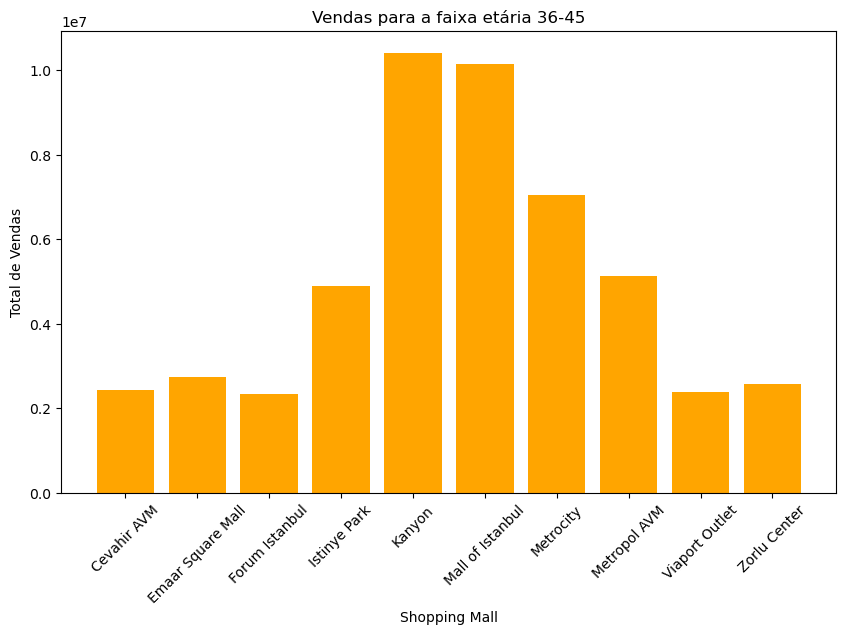

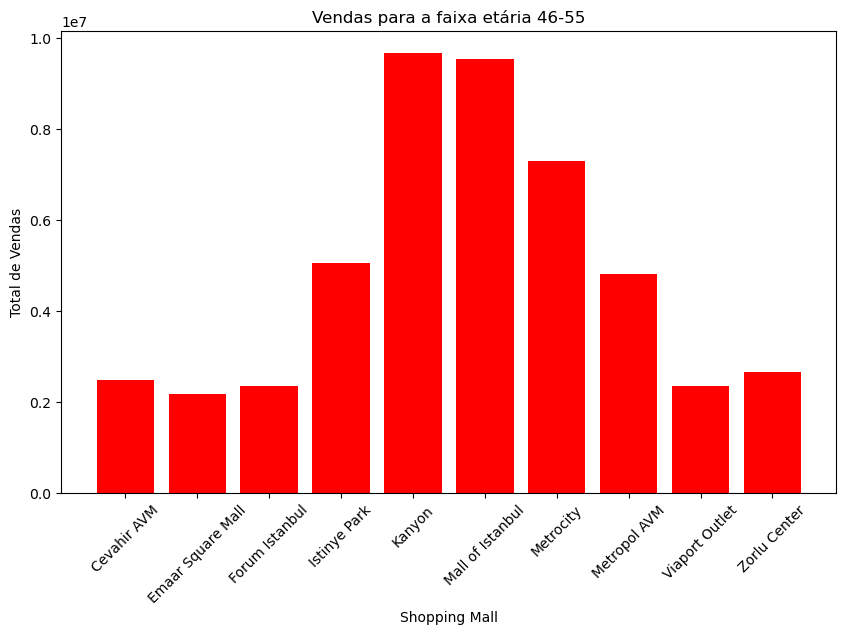

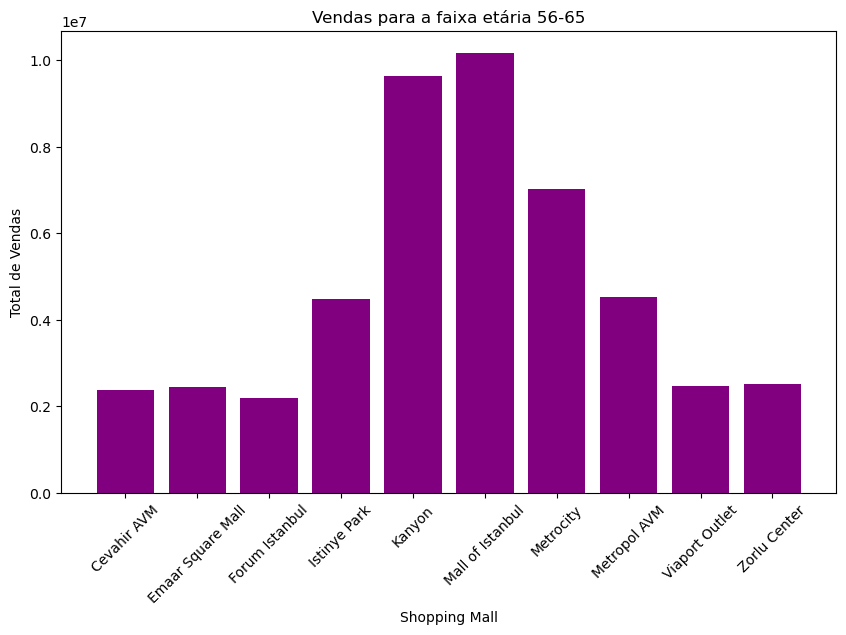

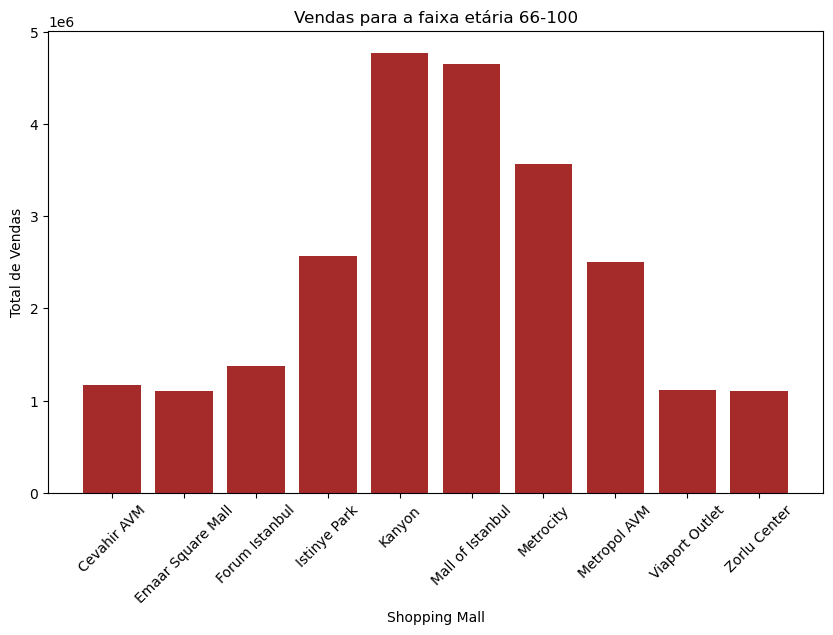

In [38]:
# Lista das faixas etárias e suas respectivas cores
age_groups = ['19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
colors = ['royalblue', 'forestgreen', 'orange', 'red', 'purple', 'brown']

# Gerar um gráfico para cada faixa etária
for index, age_group in enumerate(age_groups):
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_age_mall.index, sales_by_age_mall[age_group], color=colors[index])
    plt.title(f'Vendas para a faixa etária {age_group}')
    plt.xlabel('Shopping Mall')
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=45)
    plt.show()

Aqui estão os shoppings que mais venderam em cada faixa etária:

19-25 anos: Kanyon, com um total de vendas de R$ 6,968,564.
26-35 anos: Mall of Istanbul, com um total de vendas de R$ 9,521,269.
36-45 anos: Kanyon, com um total de vendas de R$ 10,406,257.
46-55 anos: Kanyon, com um total de vendas de R$ 9,673,113.
56-65 anos: Mall of Istanbul, com um total de vendas de R$ 10,166,282.
66-100 anos: Kanyon, com um total de vendas de R$ 4,769,609.
Observação: A faixa etária de 0-18 anos não teve vendas registradas em nenhum shopping, portanto, foi omitida na análise.

## Most sold item based on Quantity

In [39]:
# Criar uma nova tabela pivot que soma a quantidade pedida para cada categoria em cada shopping mall
most_sold_items_per_mall = df.pivot_table(index=['shopping_mall', 'category'], values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False)

# Mostrando os itens mais vendidos por shopping mall
most_sold_items_per_mall

,,quantity
shopping_mall,category,
Mall of Istanbul,Clothing,20813
Kanyon,Clothing,20513
Metrocity,Clothing,15729
Metropol AVM,Clothing,10552
Istinye Park,Clothing,10165
...,...,...
Viaport Outlet,Books,720
Zorlu Center,Souvenir,716
Cevahir AVM,Souvenir,708


C:\Users\karik\AppData\Local\Temp\ipykernel_1196\3345536367.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)


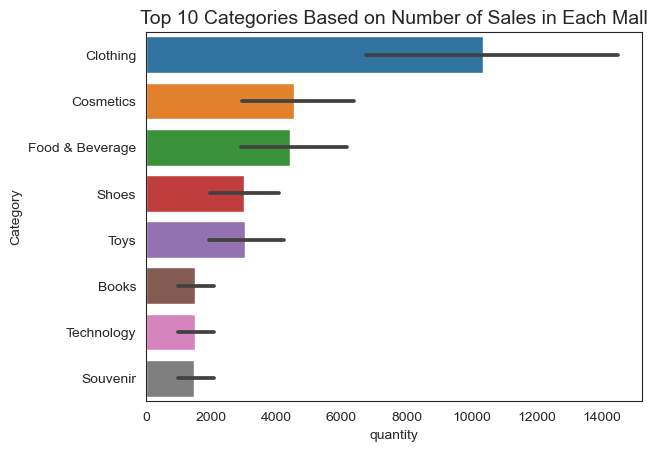

In [40]:
# Resetando o índice do DataFrame para tornar 'shopping_mall' e 'category' em colunas
most_sold_items_per_mall.reset_index(inplace=True)

# Configurando o estilo do gráfico
sns.set_style('white')

# Criando um gráfico de barras das categorias mais vendidas
# Plotando apenas as 10 categorias mais pedidas em cada shopping
top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)
sns.barplot(y='category', x='quantity', data=top_10_items)

# Adicionando um título adequado ao gráfico
plt.title('Top 10 Categories Based on Number of Sales in Each Mall', fontsize=14)

# Definindo o label do eixo Y
plt.ylabel('Category')

# Mostrar o gráfico
plt.show()

In [41]:
# Create a pivot table with customers as rows, categories as columns, and sum of quantities as values
user_item_matrix = df.pivot_table(index='customer_id', columns='category', values='quantity', aggfunc='sum', fill_value=0)

# Display the created pivot table
user_item_matrix.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
customer_id,,,,,,,,
C100004,0,5,0,0,0,0,0,0
C100005,0,0,0,0,2,0,0,0
C100006,0,0,0,0,0,0,0,3
C100012,0,0,0,5,0,0,0,0
C100019,0,0,0,0,0,0,0,1


In [43]:
# Select a smaller subset of users to avoid memory issues
subset_user_item_matrix = user_item_matrix.iloc[:500]  # using only the first 500 users

# Calculate the cosine similarity matrix for the subset
subset_cosine_sim = cosine_similarity(subset_user_item_matrix)

# Create a DataFrame for the similarity matrix, setting both rows and columns as customer_ids from the subset
subset_cosine_sim_df = pd.DataFrame(subset_cosine_sim, index=subset_user_item_matrix.index, columns=subset_user_item_matrix.index)

# Display the cosine similarity matrix for the subset
subset_cosine_sim_df.head()

customer_id,C100004,C100005,C100006,C100012,C100019,C100025,C100028,C100030,C100034,C100041,...,C101652,C101654,C101655,C101656,C101657,C101662,C101663,C101666,C101667,C101669
customer_id,,,,,,,,,,,,,,,,,,,,,
C100004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
C100005,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C100006,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
C100012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C100019,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


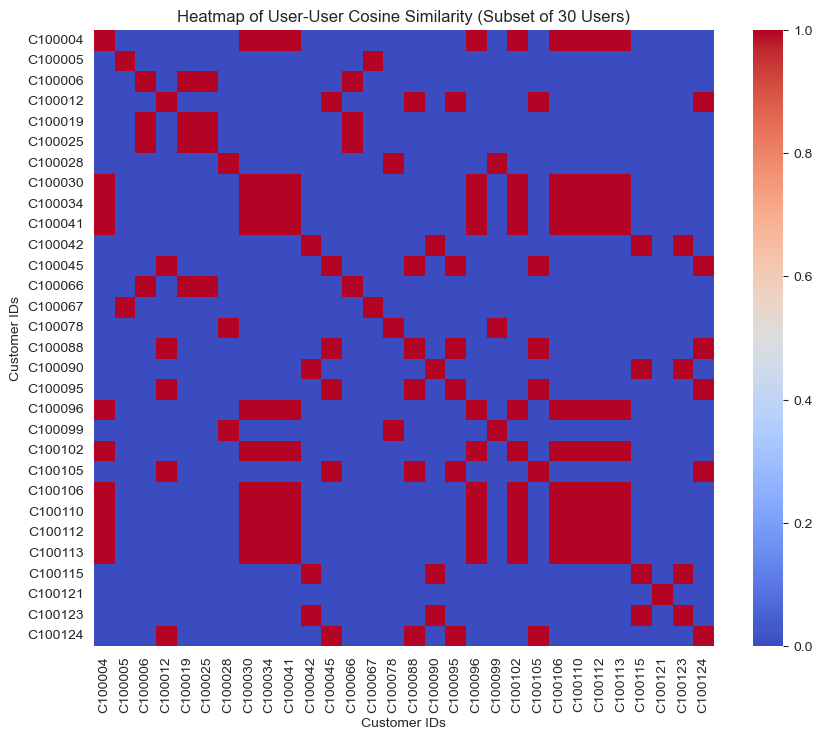

In [44]:

# Create a heatmap to visualize the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(subset_cosine_sim_df.iloc[:30, :30], annot=False, cmap='coolwarm', cbar=True)
plt.title('Heatmap of User-User Cosine Similarity (Subset of 30 Users)')
plt.xlabel('Customer IDs')
plt.ylabel('Customer IDs')
plt.show()